In [5]:
# These lines import relevant python packages, using the command 'import'.
# In this example, packages used are numpy (renamed as np), matplotlib.pyplot (renamed as plt, the dot represents subpacksge)
# and the optimize package from scipy.
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [28]:
# Read the input data for x (typically inducer conentrations) and y (typicall florescence measures)

#x=np.array([5.86,2.93,1.465,0.7325,0.36625,0.183125,0.091563,0.045781,0.022891,0.011445,0.005723,0])
#y=np.array([91523.7,90715.8,87582.3,71583.8,51311,34180.9,30596.2,29253.2,30259.8,26771.3,26320.3,25208.3])

x=np.array([400,133.3333333,44.44444444,14.81481481,4.938271605,1.646090535,0.548696845,0.182898948,0.060966316,0.020322105,0.0067740350,0])
y=np.array([90789.0,102172.4667,89830.43333,72608.56667,55563.96667,31565.4,23711.1,22009.26667,21549.7,21397.53333,21825.3,22435.86667])

In [18]:
# define the fitting functions. The two functions are provided with input x and parameters including Zmax, Keff, neff, beta.
# the output of the functions are typically gfp levels
# users can define new fitting functions

def gfp_fit_v1(x, Zmax, Keff, neff, beta):
    gfp=Zmax*(x/Keff)**neff/(1.0+(x/Keff)**neff)+beta
    return gfp

def gfp_fit_v2(x,Zmax,K1,m1,beta,C):
    gfp=Zmax*(x/K1)**m1/(1+(x/K1)**m1+C)/(1+C)+beta
    return gfp

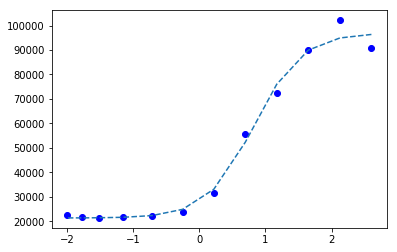

[  7.55516040e+04   6.68632198e+00   1.20980805e+00   2.13442800e+04]


In [31]:
# plot the fitting data and the experiment data using the first fitting function gfp_fit_v1

# define a figure object
fig=plt.figure()
# define an axis object from the figure
ax=fig.add_subplot(111)
# plot data using the command (ax.plot(x,y)), here the horizontal axis is in log scale
# 'bo' specifies the experiment data are plotted in blue bubble dots
ax.plot(np.log10(x+1e-2),y,'bo')

# Use the curve_fit function in the optimize package to curve fit. The reference guide for this function can be found
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# gfp_fit_v1 species the fitting function, x is the input, y is the expected output. 
# p0 species the initial guess for the parameters Zmax as 92000, Keff as 20.0, neff as 0, and beta as 0. These number as arbitary.
# bounds (bounds=([Zmax_low, Keff_low, neff_low, beta_low],[Zmax_high, Keff_high, neff_high, beta_high])) specifies the lower bounds and upper bounds for the parameters in the order Zmax, Keff, neff and beta.
# for example, the lower bound of Zmax is 0, and upper bound is infinity.
# the fitted parameters are stored in params. params[0] is Zmax, params[1] is Keff and so on
params,params_cov=optimize.curve_fit(gfp_fit_v1,x,y,p0=[92000.0,20.0,0.0,0.0],bounds=([0,0,0,0],[np.inf,np.inf,np.inf,y[-1]]))

# plot using the fitted data. The fitted data is generated using the command gfp_fit_v1(x,params[0],params[1],params[2],params[3])
# ls='--' means linestyle is in dashed line
ax.plot(np.log10(x+1e-2),gfp_fit_v1(x,params[0],params[1],params[2],params[3]),ls='--')

# save the figure as 'fit1.png'
fig.savefig('fit1.png')

# display the figure below
plt.show()

# display the parameters
print(params)

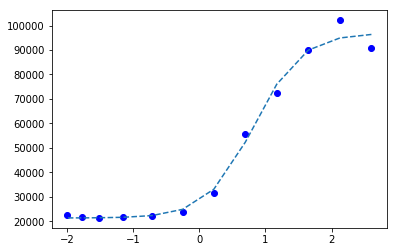

('Zmax:', 91876.137888977712, 'K1:', 5.6880393742405619, 'm1:', 1.2097913531057694, 'beta:', 21344.216366989513, 'C:', 0.21606812392306138)


In [39]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.log10(x+1e-2),y,'bo')
params,params_cov=optimize.curve_fit(gfp_fit_v2,x,y,p0=[100000.0,10.0,0.0,0.0,0.0],bounds=([y[0],0,0,0,0],[np.inf,np.inf,np.inf,np.inf,y[-1]]))
ax.plot(np.log10(x+1e-2),gfp_fit_v2(x,params[0],params[1],params[2],params[3],params[4]),ls='--')
plt.show()
fig.savefig('fit2.png')
print("Zmax:",params[0],"K1:",params[1],"m1:",params[2],"beta:",params[3],"C:",params[4])